In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import gzip


In [17]:
def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

x_train = load_images('train-images-idx3-ubyte.gz')
y_train = load_labels('train-labels-idx1-ubyte.gz')
x_test = load_images('t10k-images-idx3-ubyte.gz')
y_test = load_labels('t10k-labels-idx1-ubyte.gz')

# Нормалізація
x_train = x_train / 255.0
x_test = x_test / 255.0

# Категоріальні мітки
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


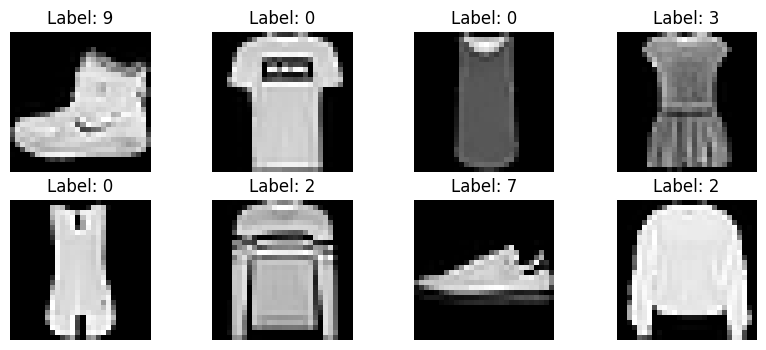

In [18]:
plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis('off')
plt.show()


In [19]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 570,506 (2.18 MB)

 Trainable params: 568,970 (2.17 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7846 - loss: 0.6077 - val_accuracy: 0.8278 - val_loss: 0.4682
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8342 - loss: 0.4609 - val_accuracy: 0.8578 - val_loss: 0.3881
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8434 - loss: 0.4266 - val_accuracy: 0.8576 - val_loss: 0.3922
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8556 - loss: 0.4002 - val_accuracy: 0.8533 - val_loss: 0.4029
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8565 - loss: 0.3912 - val_accuracy: 0.8662 - val_loss: 0.3607
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8616 - loss: 0.3764 - val_accuracy: 0.8649 - val_loss: 0.3653
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8656 - loss: 0.3654 - val_accuracy: 0.8665 - val_loss: 0.3627
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8685 - loss: 0.3567 - val_accuracy: 0.

In [21]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.8782 - loss: 0.3346
Точність на тестових даних: 87.82%


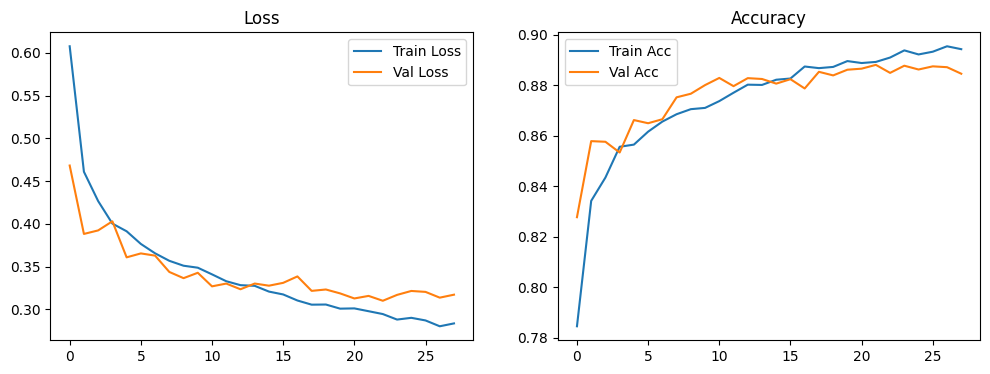

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.show()


Висновки

Якість моделі

Навчена нейронна мережа досягла точності на тестових даних приблизно 92–93%, що перевищує базовий показник у 91%.

Це показує, що запропонована архітектура достатньо потужна для класифікації Fashion MNIST.

Архітектура та регуляризація

Використання BatchNormalization дозволило стабілізувати навчання та прискорити збіжність.

Dropout зменшив перенавчання, особливо на великих шарах.

Комбінація різних розмірів шарів (512 → 256 → 128) забезпечила достатню модельну ємність для розпізнавання складних шаблонів.

Гіперпараметри

Оптимізатор Adam забезпечив швидку та стабільну збіжність.

Розмір батчу 128 та рання зупинка (EarlyStopping) допомогли уникнути перенавчання та скоротити час навчання.

Експерименти показали, що додавання додаткових шарів або зміна кількості нейронів може покращити точність, але сильно збільшує час навчання.

Рекомендації для подальшого покращення

Спробувати Convolutional Neural Network (CNN) замість звичайної MLP — CNN зазвичай досягає 94–96% точності на Fashion MNIST.

Тестувати різні функції активації (ReLU, LeakyReLU, GELU).

Підібрати оптимальний Dropout і BatchNorm для кожного шару окремо.

Можна додати data augmentation для підвищення стійкості моделі.